<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Implement a scoring model - P7</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Notebook optimization |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and files</h2>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries</h3>
</div>

In [1]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE

## Own specific functions 
from functions import *

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Files</h3>
</div>

In [2]:
df = pd.read_csv(r"datasets\df_processed.csv")
df = df.drop(columns=["index"])

In [3]:
df_analysis(df, "df", analysis_type="header")


Analysis Header of df dataset
--------------------------------------------------------------------------------
- Dataset shape:			 356251 rows and 797 columns
- Total of NaN values:			 72099981
- Percentage of NaN:			 25.39 %
- Total of infinite values:		 21
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 2.1 GB


In [4]:
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.select_dtypes(include=["object"]).columns.tolist()

[]

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li><b>Missing values</b> - There are 25.39% of missing-values to treat</li>
        <li><b>Columns type</b> - All columns are numerics</li>
        <li><b>Infinite values</b> - There are 25 infinite values</li>
    </ul> 
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Class Imbalance</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to analyze in details, whether ours target has an imbalanced class
   </p>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Verifying</h3>
</div>

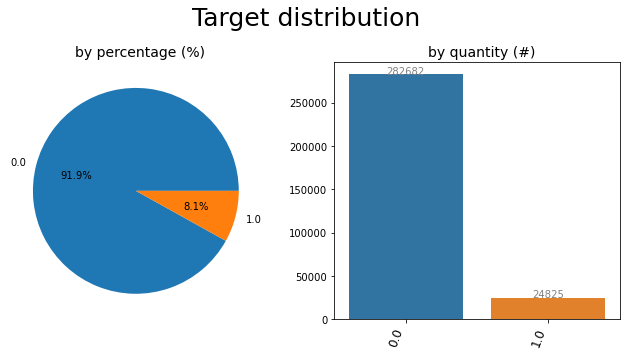

In [7]:
barplot_and_pie(df["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-warning">
    <p>Here we can see how much the dataset is imbalanced</p>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Missing-values</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Before treating the class imbalance in the target, it is necessary to treat the missing-values in all the dataset, to do that, we are going to fill values with SimpleImputer
   </p>
    <p>Let's start by identifying the features with infinite-values and replace them by missing-values
   </p>
</div>
</div>

In [17]:
inf_cols = df.columns.to_series()[np.isinf(df).any()]

In [21]:
for col in inf_cols:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)

In [22]:
df_analysis(df, "df", analysis_type="header")


Analysis Header of df dataset
--------------------------------------------------------------------------------
- Dataset shape:			 356251 rows and 797 columns
- Total of NaN values:			 72100002
- Percentage of NaN:			 25.39 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 2.1 GB


<div class="alert alert-block alert-info">
    <p>Let's continue by identifying the features with missingv-values and excluding the TARGET
   </p>
</div>
</div>

In [23]:
nan_cols = [i for i in df.columns if i!="TARGET" and df[i].isnull().any()]

<div class="alert alert-block alert-info">
    <p>Filling missing-values
   </p>
</div>

In [24]:
for col in nan_cols:
    mean_value = df[col].mean()
    df[col].fillna(value=mean_value, inplace=True)

In [25]:
df_analysis(df, "df", analysis_type="header")


Analysis Header of df dataset
--------------------------------------------------------------------------------
- Dataset shape:			 356251 rows and 797 columns
- Total of NaN values:			 48744
- Percentage of NaN:			 0.02 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 2.1 GB


<div class="alert alert-block alert-success">
    <p>At this point, TARGET is the only column with missing-values</p>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Smote</h3>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the Imbalanced class, we are going to use a type of data augmentation for the minority class where new examples can be synthesized from the existing examples and it is referred as the Synthetic Minority Oversampling Technique - SMOTE.</p>
</div>

In [27]:
train_df = df[df["TARGET"].notnull()]
test_df = df[df["TARGET"].isnull()]

In [28]:
X = train_df.drop(columns=["TARGET"])

In [29]:
y = train_df.loc[:,"TARGET"]

<div class="alert alert-block alert-info">
    <p>Initializing SMOTE</p>
</div>

In [31]:
smote = SMOTE(sampling_strategy="auto", k_neighbors=5, n_jobs=-1,
              random_state=42)

<div class="alert alert-block alert-info">
    <p>Executing SMOTE</p>
</div>

In [32]:
X_resampled, y_resampled = smote.fit_resample(X, y)

<div class="alert alert-block alert-info">
    <p>Finally, we can see the results</p>
</div>

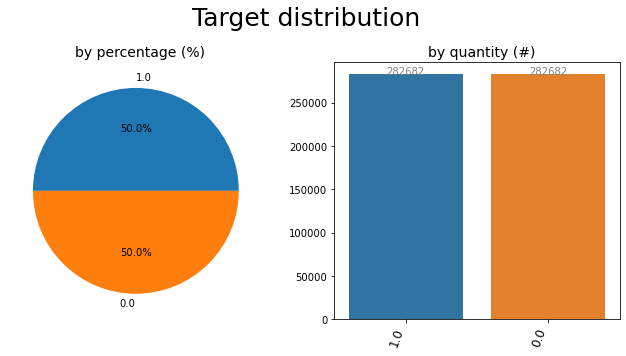

In [33]:
barplot_and_pie(y_resampled, "Target distribution", " ")

<div class="alert alert-block alert-success">
    <p>Now, we have the Target balanced</p>
</div>

<div class="alert alert-block alert-danger">
    <h2>FLAG</h2>
</div>

In [ ]:
df_analysis(train_df, "df", analysis_type="header")

In [ ]:
df_analysis(df, "test_df", analysis_type="summarized")

In [ ]:
gc

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

In [ ]:
counter = Counter(y)
print(counter)

In [30]:
# Oversampling using smote on X_tr_enc 



In [ ]:
#ds = df.isin([np.inf, -np.inf])
  
# printing the count of infinity values
print()
print("printing the count of infinity values")
  
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")

In [ ]:

  
ds = df.isin([np.inf, -np.inf])
print(ds)
  
# printing the count of infinity values
print()
print("printing the count of infinity values")
  
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")
  
# counting infinity in a particular column name
c = np.isinf(df['Weight']).values.sum()
print("It contains " + str(c) + " infinite values")
  
# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = df.columns.to_series()[np.isinf(df).any()]
print(col_name)
  
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df.index[np.isinf(df).any(1)]
print(r)

In [ ]:
xx

In [ ]:
del df
gc.collect()

In [ ]:
gc.collect()

In [14]:
data = {'Student ID': [10, 11, 12, 13, 14], 
        'Age': [23, 22, 24, np.inf, 25],
        'Weight': [66, 72, np.inf, 68, -np.inf]}

In [15]:
df_data = pd.DataFrame(data)

In [16]:
print("printing column name where infinity is present")
col_name = df_data.columns.to_series()[np.isinf(df_data).any()]
print(col_name)

printing column name where infinity is present
Age          Age
Weight    Weight
dtype: object
